Vehicle Price by Odometer Analysis

For this analysis, I'll look through the data and discover the correlation between the price of the vehicles and how expensive they are.
To do this, I'll download the data set and clean up errors, such as missing pieces of data.
I theorize that as the odometer readings increase on the car, the price will decrease.

I imported the libraries I am going to use to build my web app and
also imported the data set for the vehicles.
I will explore the different columns of data to see if there are any big issues that need to be fixed.

In [69]:
import pandas as pd
import streamlit as st
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

vehicle_data = pd.read_csv('vehicles_us.csv')

display(vehicle_data)
display(vehicle_data['cylinders'].head(20))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,6/23/2018,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,10/19/2018,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2/7/2019,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,3/22/2019,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,4/2/2019,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,10/3/2018,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,11/14/2018,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,11/15/2018,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,7/2/2018,71


0     6.0
1     6.0
2     4.0
3     8.0
4     4.0
5     6.0
6     4.0
7     6.0
8     4.0
9     NaN
10    8.0
11    4.0
12    8.0
13    4.0
14    8.0
15    8.0
16    8.0
17    6.0
18    6.0
19    4.0
Name: cylinders, dtype: float64

The first thing I noticed is missing data in the model_year, the odometer readings, and the cylinder columns. We can fix this by adding the median values of the respective columns to the missing values, since this will make the data easier to graph.

This cache stores the function that replaces the missing values with the median value, allowing the app to run more smoothly. 

In [70]:
@st.cache_data
def median_value(group):
    if group.notnull().any():
        return group.fillna(group.median())
    else:
        return group.fillna(np.nan)

2023-09-18 16:12:07.021 No runtime found, using MemoryCacheStorageManager


This first grouping of code adds the median value to each column where there are missing values. 

Right below is where I changed the names of the columns to more presentable names.

In [71]:
vehicle_data['model_year'] = vehicle_data.groupby('model')['model_year'].transform(median_value)
vehicle_data['cylinders'] = vehicle_data.groupby('model')['cylinders'].transform(median_value)
vehicle_data['odometer'] = vehicle_data.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

new_column_names = {'price': 'Price', 'model_year': 'Model Year', 'model': 'Model', 'condition': 'Condition', 'cylinders': 'Cylinders', 'fuel': 'Fuel',
                    'odometer': 'Odometer', 'transmission': 'Transmission', 'type': 'Type', 'paint_color': 'Paint Color', 'is_4wd': 'Has 4WD', 'date_posted': 'Date Posted',
                    'days_listed': 'Days Listed'}
vehicle_data.rename(columns=new_column_names, inplace=True)

c:\Users\Zachary\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



Here we create the title of the web page and the code for the histogram and scatterplots.
First, I have a streamlit show us the filtered data based on the car model chosen.
Then, I can change the scatterplot to compare each column of the selected car model
Then the histogram displays the same column selected in the scatterplot on the x-axis

In [72]:
st.title('Vehicle Data Analysis Tool')

st.set_option('deprecation.showPyplotGlobalUse', False)

select_model = st.selectbox('Select a car model', vehicle_data['Model'].unique())
filtered_data = vehicle_data[vehicle_data['Model'] == select_model]

st.write('Filtered Data:')
st.write(filtered_data)

st.subheader('Scatterplot for selected car model')
x_column = st.selectbox('Select x-axis column', vehicle_data.columns)
y_column = st.selectbox('Select y-axis column', vehicle_data.columns)

fig = px.scatter(filtered_data, x=x_column, y=y_column, title=f"Scatterplot: {x_column} vs {y_column}")
st.plotly_chart(fig)

st.subheader('Histogram for selected car model')
fig = px.histogram(filtered_data, x=x_column, nbins=20, title=f"Histogram: {x_column}")
st.plotly_chart(fig)

st.write(f"Statistics for {x_column}:")
st.write(filtered_data[x_column].describe())

This will display the statistics for each column selected in the dropdown menu.

In [73]:
st.write(f"Statistics for {x_column}:")

st.write(vehicle_data[x_column].describe())

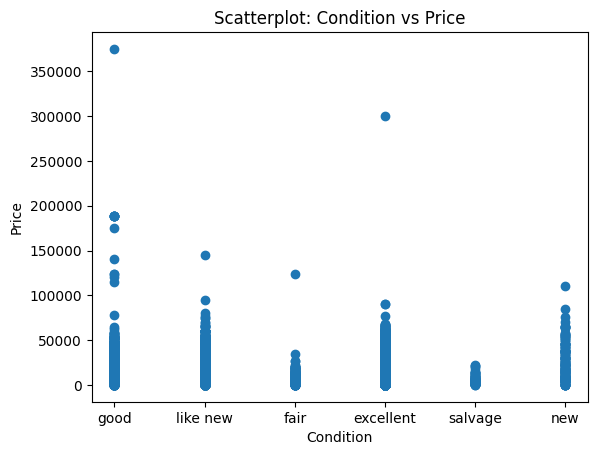

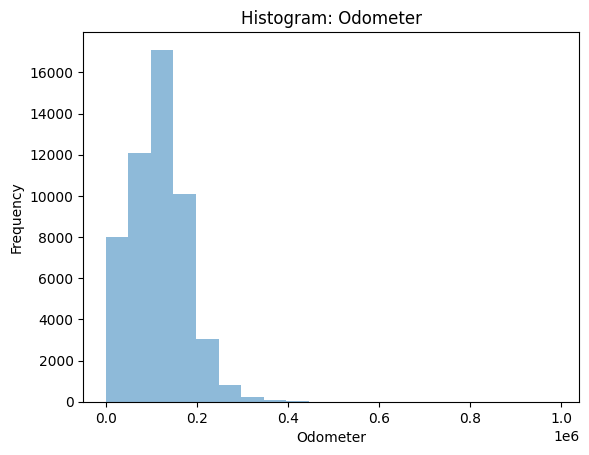

In [74]:
plt.scatter(vehicle_data['Condition'], vehicle_data['Price'])
plt.title('Scatterplot: Condition vs Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

vehicle_data['Odometer'].plot.hist(bins=20, alpha=0.5)
plt.title('Histogram: Odometer')
plt.xlabel('Odometer')
plt.show()

From the graphs in the web application, aside from a very few outliers, it's clear that with most car brands, as the odometer readings increase, the price of the car decreases.
We can visually see this by the general downward trend on each car brand in the scatterplots. 